In [5]:
import pandas as pd
import numpy as np
import json

#### Getting keys

In [6]:
def analyze_json_structure(data, key_prefix=''):
    """
    Analyzes the structure of JSON data and identifies the main repeating components.

    Args:
    - data: JSON data (dictionary or list)
    - key_prefix: Prefix for the current key (used in recursive calls)

    Returns:
    - Dictionary containing information about the structure
    """
    structure = {}

    if isinstance(data, dict):
        for key, value in data.items():
            new_key = f"{key_prefix}.{key}" if key_prefix else key
            if isinstance(value, (dict, list)):
                structure[new_key] = analyze_json_structure(value, new_key)
            else:
                structure[new_key] = type(value).__name__
    elif isinstance(data, list):
        if data:
            structure[key_prefix] = analyze_json_structure(data[0], key_prefix)
        else:
            structure[key_prefix] = 'Empty List'

    return structure

# Load JSON data from file
with open('annotations\\train2017.json', 'r') as f:
    json_data = json.load(f)

# Analyze the structure of the JSON data
json_structure = analyze_json_structure(json_data)

# Print the structure
print(json_structure)


{'info': {'info.description': 'NoneType', 'info.url': 'NoneType', 'info.version': 'NoneType', 'info.year': 'int', 'info.contributor': 'NoneType', 'info.date_created': 'str'}, 'licenses': {'licenses': {'licenses.url': 'NoneType', 'licenses.id': 'int', 'licenses.name': 'NoneType'}}, 'images': {'images': {'images.license': 'int', 'images.url': 'NoneType', 'images.file_name': 'str', 'images.height': 'int', 'images.width': 'int', 'images.date_captured': 'NoneType', 'images.id': 'int'}}, 'type': 'str', 'annotations': {'annotations': {'annotations.id': 'int', 'annotations.image_id': 'int', 'annotations.category_id': 'int', 'annotations.segmentation': {'annotations.segmentation': {'annotations.segmentation': {}}}, 'annotations.area': 'float', 'annotations.bbox': {'annotations.bbox': {}}, 'annotations.iscrowd': 'int'}}, 'categories': {'categories': {'categories.supercategory': 'NoneType', 'categories.id': 'int', 'categories.name': 'str'}}}


#### Mapping the annotations with images

In [7]:
import json
import cv2

# Load JSON data from file
with open('annotations/train2017.json', 'r') as f:
    data = json.load(f)

# Access images and annotations
images_data = data['images']
annotations_data = data['annotations']

# Load images and process annotations
for image_info in images_data:
    image_id = image_info['id']
    file_name = image_info['file_name']
    height = image_info['height']
    width = image_info['width']

    # Load image using OpenCV or PIL
    image = cv2.imread('JPEGImages/' + file_name)  # Adjust path as per your file structure

    print(f"Loaded image: {file_name}")
    print(f"Image ID: {image_id}")
    print(f"Image dimensions: {height} x {width}")

    # Process annotations for this image
    image_annotations = [annotation for annotation in annotations_data if annotation['image_id'] == image_id]
    print(f"Number of annotations for this image: {len(image_annotations)}")

    for annotation in image_annotations:
        category_id = annotation['category_id']
        segmentation = annotation['segmentation']
        area = annotation['area']
        bbox = annotation['bbox']
        is_crowd = annotation['iscrowd']

        print(f"Annotation - Category ID: {category_id}, Area: {area}, Bounding Box: {bbox}, Is Crowd: {is_crowd}")

    print("="*50)  # Separator between images

# Use image and annotations for your model training or evaluation


Loaded image: P0001_0_800_7200_8000.jpg
Image ID: 0
Image dimensions: 800 x 800
Number of annotations for this image: 13
Annotation - Category ID: 1, Area: 61.0, Bounding Box: [603.0, 556.0, 8.0, 10.0], Is Crowd: 0
Annotation - Category ID: 1, Area: 276.0, Bounding Box: [465.0, 64.0, 12.0, 34.0], Is Crowd: 0
Annotation - Category ID: 1, Area: 78.0, Bounding Box: [595.0, 550.0, 8.0, 13.0], Is Crowd: 0
Annotation - Category ID: 1, Area: 35.0, Bounding Box: [636.0, 557.0, 4.0, 11.0], Is Crowd: 0
Annotation - Category ID: 1, Area: 67.0, Bounding Box: [583.0, 557.0, 7.0, 13.0], Is Crowd: 0
Annotation - Category ID: 1, Area: 44.0, Bounding Box: [632.0, 555.0, 5.0, 10.0], Is Crowd: 0
Annotation - Category ID: 1, Area: 361.0, Bounding Box: [585.0, 530.0, 46.0, 13.0], Is Crowd: 0
Annotation - Category ID: 1, Area: 73.0, Bounding Box: [566.0, 536.0, 12.0, 7.0], Is Crowd: 0
Annotation - Category ID: 1, Area: 59.0, Bounding Box: [561.0, 536.0, 6.0, 12.0], Is Crowd: 0
Annotation - Category ID: 1, A

#### Seeing any 5 images

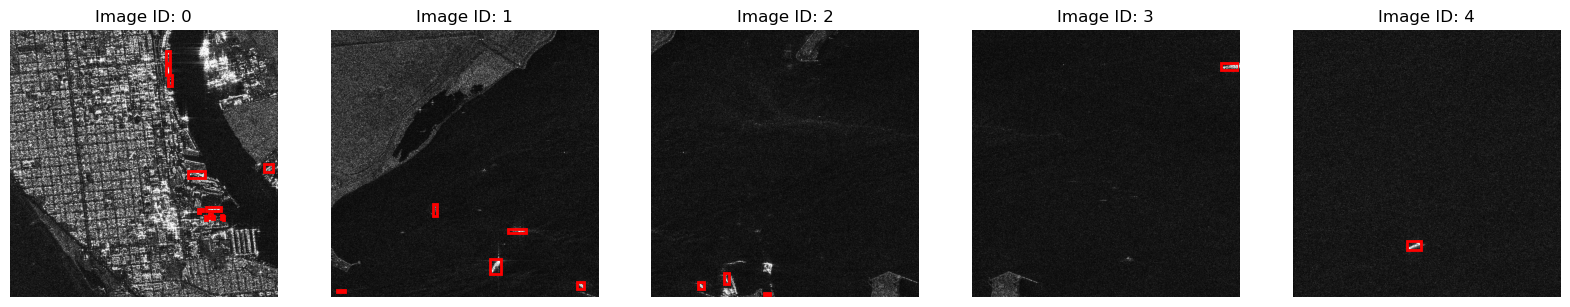

In [8]:
# Display any 5 images and their corresponding annotations
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load JSON data from file
with open('annotations/train2017.json', 'r') as f:
    data = json.load(f)

# Access images and annotations
images_data = data['images']
annotations_data = data['annotations']

# Load and display images
num_images_to_display = 5
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))

for i in range(num_images_to_display):
    # Load image using OpenCV or PIL
    image_info = images_data[i]
    file_name = image_info['file_name']
    image = cv2.imread('JPEGImages/' + file_name)  # Adjust path as per your file structure

    # Display image
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Image ID: {image_info['id']}")
    axes[i].axis('off')

    # Process annotations for this image
    image_annotations = [annotation for annotation in annotations_data if annotation['image_id'] == image_info['id']]

    # Display annotations
    for annotation in image_annotations:
        bbox = annotation['bbox']
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
        axes[i].add_patch(rect)

plt.show()

#### Convert the json data to a dataframe

In [9]:
df_images = pd.DataFrame(images_data)
df_annotations = pd.DataFrame(annotations_data)
print(df_images.head())

   license   url                   file_name  height  width date_captured  id
0        0  None   P0001_0_800_7200_8000.jpg     800    800          None   0
1        0  None   P0001_0_800_8400_9200.jpg     800    800          None   1
2        0  None   P0001_0_800_9000_9800.jpg     800    800          None   2
3        0  None  P0001_0_800_9600_10400.jpg     800    800          None   3
4        0  None   P0001_1200_2000_0_800.jpg     800    800          None   4


#### Process the test data

In [10]:
import json
import cv2

# Load JSON data from the test file
with open('annotations/test2017.json', 'r') as f:
    test_data = json.load(f)

# Access images and annotations from the test data
test_images_data = test_data['images']
test_annotations_data = test_data['annotations']

# Load images and process annotations for the test data
for image_info in test_images_data:
    image_id = image_info['id']
    file_name = image_info['file_name']
    height = image_info['height']
    width = image_info['width']

    # Load the test image using OpenCV or PIL
    test_image = cv2.imread('JPEGImages/' + file_name)  # Adjust path as per your file structure

    print(f"Loaded test image: {file_name}")
    print(f"Test Image ID: {image_id}")
    print(f"Test Image dimensions: {height} x {width}")

    # Process annotations for the test image
    image_annotations = [annotation for annotation in test_annotations_data if annotation['image_id'] == image_id]
    print(f"Number of annotations for this test image: {len(image_annotations)}")

    for annotation in image_annotations:
        category_id = annotation['category_id']
        segmentation = annotation['segmentation']
        area = annotation['area']
        bbox = annotation['bbox']
        is_crowd = annotation['iscrowd']

        print(f"Annotation - Category ID: {category_id}, Area: {area}, Bounding Box: {bbox}, Is Crowd: {is_crowd}")

    print("=" * 50)  # Separator between test images

# Use test images and annotations for your model evaluation or testing

Loaded test image: P0001_0_800_10190_10990.jpg
Test Image ID: 0
Test Image dimensions: 800 x 800
Number of annotations for this test image: 2
Annotation - Category ID: 1, Area: 260.0, Bounding Box: [237.0, 79.0, 42.0, 8.0], Is Crowd: 0
Annotation - Category ID: 1, Area: 1058.0, Bounding Box: [157.0, 96.0, 93.0, 25.0], Is Crowd: 0
Loaded test image: P0001_1200_2000_10190_10990.jpg
Test Image ID: 1
Test Image dimensions: 800 x 800
Number of annotations for this test image: 2
Annotation - Category ID: 1, Area: 403.0, Bounding Box: [181.0, 657.0, 37.0, 53.0], Is Crowd: 0
Annotation - Category ID: 1, Area: 262.0, Bounding Box: [0.0, 306.0, 24.0, 25.0], Is Crowd: 0
Loaded test image: P0001_1200_2000_3600_4400.jpg
Test Image ID: 2
Test Image dimensions: 800 x 800
Number of annotations for this test image: 2
Annotation - Category ID: 1, Area: 807.0, Bounding Box: [270.0, 638.0, 62.0, 28.0], Is Crowd: 0
Annotation - Category ID: 1, Area: 660.0, Bounding Box: [737.0, 303.0, 57.0, 21.0], Is Crowd

In [11]:
df_images = pd.DataFrame(test_images_data)
df_annotations = pd.DataFrame(test_annotations_data)
print(df_images.head())

   license   url                        file_name  height  width  \
0        0  None      P0001_0_800_10190_10990.jpg     800    800   
1        0  None  P0001_1200_2000_10190_10990.jpg     800    800   
2        0  None    P0001_1200_2000_3600_4400.jpg     800    800   
3        0  None        P0001_1800_2600_0_800.jpg     800    800   
4        0  None    P0001_1800_2600_7800_8600.jpg     800    800   

  date_captured  id  
0          None   0  
1          None   1  
2          None   2  
3          None   3  
4          None   4  


#### Convert annotations to yolo format (done on terminal)

#### Splitting into train and test based on annotations

In [1]:
import os
import shutil

# Define input and output paths
image_folder = 'G:\\SAR\\HRSID_jpg\\JPEGImages'
train_annotation_folder = 'G:\\SAR\\HRSID_jpg\\train_annotations'
test_annotation_folder = 'G:\\SAR\\HRSID_jpg\\test_annotations'
output_train_folder = 'G:\\SAR\\HRSID_jpg\\dataset\\images\\train'
output_val_folder = 'G:\\SAR\\HRSID_jpg\\dataset\\images\\val'

# Iterate through image folder
for image_file in os.listdir(image_folder):
    if image_file.endswith('.jpg') or image_file.endswith('.jpeg') or image_file.endswith('.png'):
        image_name = os.path.splitext(image_file)[0]
        train_annotation_path = os.path.join(train_annotation_folder, f'{image_name}.txt')
        test_annotation_path = os.path.join(test_annotation_folder, f'{image_name}.txt')

        # Check if the image has corresponding annotations in train or test folders
        if os.path.exists(train_annotation_path):
            # Move image to the train folder
            shutil.copy(os.path.join(image_folder, image_file), os.path.join(output_train_folder, image_file))
        elif os.path.exists(test_annotation_path):
            # Move image to the test folder
            shutil.copy(os.path.join(image_folder, image_file), os.path.join(output_val_folder, image_file))
        else:
            print(f"No annotations found for {image_file}")


No annotations found for P0036_1200_2000_3600_4400.jpg
